<a href="https://colab.research.google.com/github/Rmaserati/Stock-Analaysis-ML-Porject/blob/main/Stock_Price_Analysis_(Pfizer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program that uses a recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Pfizer inc.) using the past 60 days stock price.

In [ ]:
!pip install yfinance


In [ ]:
#Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the Stock quote
df = yf.download('PFE', start='2018-01-01', end='2022-12-25')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02 00:00:00-05:00,34.516129,34.648956,34.383301,34.573055,28.559780,17059833
2018-01-03 00:00:00-05:00,34.582542,34.886147,34.373814,34.829224,28.771393,14183151
2018-01-04 00:00:00-05:00,34.829224,35.028461,34.724857,34.905125,28.834095,13046517
2018-01-05 00:00:00-05:00,34.933586,34.990513,34.734344,34.971539,28.888952,13167517
2018-01-08 00:00:00-05:00,34.838711,34.914612,34.468693,34.582542,28.567612,19964341
...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,51.520000,51.810001,50.700001,51.360001,50.892780,16081900
2022-12-20 00:00:00-05:00,51.209999,51.509998,50.840000,51.320000,50.853142,12433800
2022-12-21 00:00:00-05:00,51.610001,52.160000,51.200001,51.660000,51.190048,12925000


In [ ]:
#Get rows and columns
df.shape

(1255, 6)

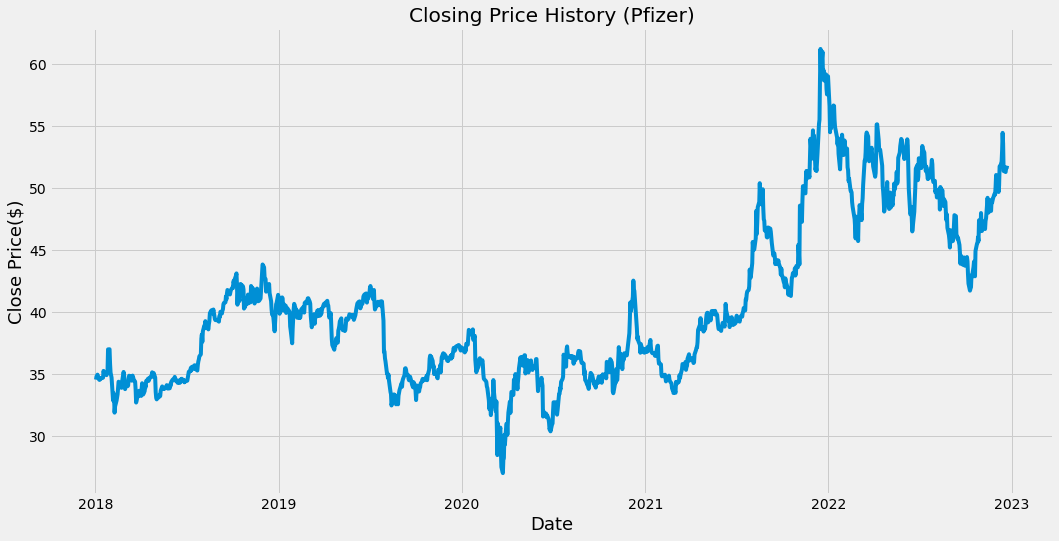

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History (Pfizer)')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price($)', fontsize=18)
plt.show()

In [ ]:
#Create a new DF with only the 'Close Column'
data = df.filter(['Close'])
#Conver the df to an array
dataset = data.values
#Get the # of rows to train the model on (Training on about 80% of the data)
training_data_len = math.ceil( len(dataset) * .8) #Math.ceil rounds up the number
training_data_len

1004

In [ ]:
#Scaling the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.22042004],
       [0.22790604],
       [0.2301241 ],
       ...,
       [0.71975157],
       [0.71916709],
       [0.72471953]])

In [ ]:
#Creating the Training Dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Splitting the columns into x_train and y_train datasets
x_train = [] #Independent Features
y_train = [] #Target Variables

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #This contains 60 values from 0 - 59
  y_train.append(train_data[i, 0]) #This will contain the 61st value which is at 60th position

  


In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data. This is done because the LSTM network expects the input to be 3D which contains Number of samples, Number of time steps and Number of Features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #This reshapes it to the number of columns, number of rows and Number of features respectively 
x_train.shape

(944, 60, 1)

In [ ]:
#Building the LSTM Model. This is the model's architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compiling the Model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
#Training the Model
model.fit(x_train, y_train, batch_size = 1, epochs=1)

944/944 [==============================] - 31s 29ms/step - loss: 0.0031


In [ ]:
#Creating the Testing Dataset
#Creating a new array containing scaled values.
test_data = scaled_data[training_data_len-60:, :]
#Creat the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to numpy array. Doing this step so that it can be used in the LSTM Model. Next Step: Reshaping the data
x_test = np.array(x_test)

In [ ]:
#Reshaping the data. # of rows = # of samples, # of columns = # of time steps, # of features = closed price
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Want predictions to contain the some values as the y_test dataset.

8/8 [==============================] - 1s 19ms/step


In [ ]:
#Get the Root Mean Squared Error (RMSE). Shows how accurate the model predicts the response. 
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

1.694686813658452

<ipython-input-28-8af42a8d2465>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


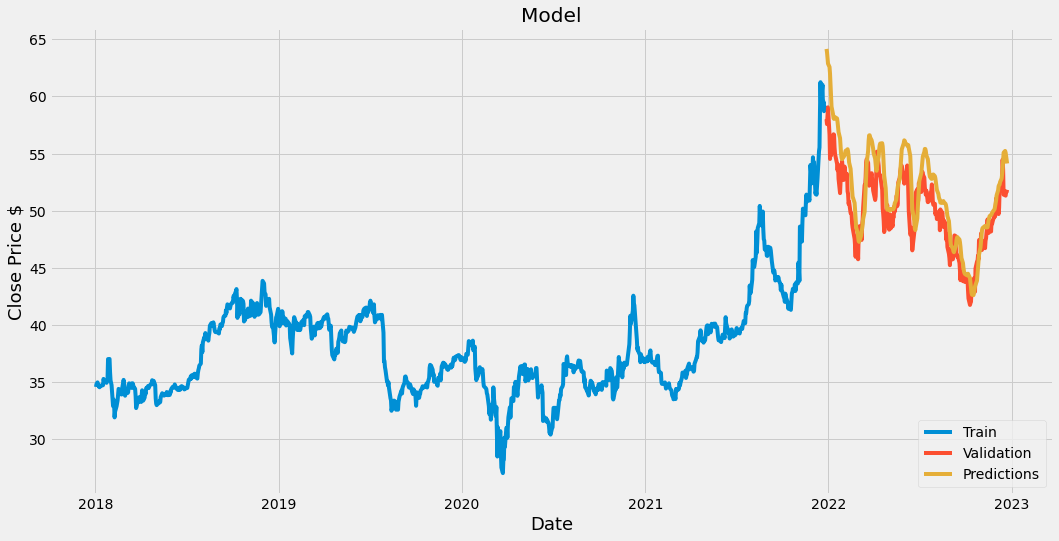

In [ ]:
#Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize= (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions' ]])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-12-28 00:00:00-05:00,58.009998,64.161926
2021-12-29 00:00:00-05:00,57.580002,63.872971
2021-12-30 00:00:00-05:00,58.400002,63.343449
2021-12-31 00:00:00-05:00,59.049999,62.873146
2022-01-03 00:00:00-05:00,56.650002,62.582260
...,...,...
2022-12-19 00:00:00-05:00,51.360001,55.233562
2022-12-20 00:00:00-05:00,51.320000,55.084637
2022-12-21 00:00:00-05:00,51.660000,54.767494


In [ ]:
#Get the quote
pfizer_quote = yf.download('PFE', start='2018-01-01', end='2022-12-25')
#Create a new df
new_df = pfizer_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the last 60 days to the X_test list
X_test.append(last_60_days_scaled)
#Conver the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data to be 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 27ms/step
[[53.90605]]


In [ ]:
pfizer_quote2 = yf.download('PFE', start='2018-01-01', end='2022-12-03')
print(pfizer_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2018-01-02 00:00:00-05:00    34.573055
2018-01-03 00:00:00-05:00    34.829224
2018-01-04 00:00:00-05:00    34.905125
2018-01-05 00:00:00-05:00    34.971539
2018-01-08 00:00:00-05:00    34.582542
                               ...    
2022-11-28 00:00:00-05:00    49.570000
2022-11-29 00:00:00-05:00    49.490002
2022-11-30 00:00:00-05:00    50.130001
2022-12-01 00:00:00-05:00    51.080002
2022-12-02 00:00:00-05:00    50.910000
Name: Close, Length: 1240, dtype: float64
